# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))



Total score (averaged over agents) this episode: 0.16649999627843498


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
%load_ext autoreload
%autoreload 2


In [9]:
from ddpg_agent import DDPGAgent
from collections import deque

import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def ddpgrunner(ddpgagent, episodes = 200, print_every=10, stable_episode_count=100, target_score = 30):
    
    
    scores_deque = deque(maxlen=stable_episode_count)
    scores = []
    
    episodes_start = time.time()
    for i_episode in range(1, episodes+1):
        #print("Training episode: {}".format(e+1))
        env_info = env.reset(train_mode=True)[brain_name]     

        ## First value batch
        states = env_info.vector_observations

        score = np.zeros((20,))
        while(True):

            actions = ddpgagent.act(states)
            env_info = env.step(actions)

            next_states = env_info[brain_name].vector_observations
            rewards = env_info[brain_name].rewards                         
            dones = env_info[brain_name].local_done  

            score += np.array(rewards)

            ddpgagent.step(states, actions, rewards, next_states, dones)
            states = next_states

            if any(dones):                                 
                break


            torch.save(ddpgagent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(ddpgagent.critic_local.state_dict(), 'checkpoint_critic.pth')

        score_avg = np.mean(score)
        scores.append(score_avg)
        scores_deque.append(score_avg)
        #print('\rEpisode {}\tTotal score: {:.2f}'.format(e+1, score_avg))

        if np.mean(scores_deque) <= target_score:
            if i_episode % print_every == 0:
                episodes_end = time.time()
                print('\rEpisode {}\tAverage score in the latest {} episodes: \
                      {}'.format(i_episode, i_episode if i_episode <= stable_episode_count \
                                 else stable_episode_count, np.mean(scores_deque)))
                print('\rLast {} episodes took {} seconds'.format(print_every, episodes_end - episodes_start))
                episodes_start = time.time()
        else:
            print('\rEpisode {}\tAverage score in the latest {} episodes: \
                    {}'.format(i_episode, i_episode if i_episode <= stable_episode_count \
                               else stable_episode_count, np.mean(scores_deque)))
            print('\r\rThe score average is over {} in the last {} episodes. \
                    Stop the training.'.format(target_score, stable_episode_count))
            break
    
        
    return scores

In [11]:
def plotGraphs(scorelist, cols = 2, rows = 4, size = (16, 9)):
    '''
    Display images in a grid
    '''
    
    number_of_images = len(scorelist)
    
    
    figure, axes = plt.subplots(rows, cols, figsize = size)
    indices = range(number_of_images)
    figure.subplots_adjust(hspace = 0.5)
    #print(axes)
    for ax, index in zip(axes.flat, indices):
        #print(index)
        np.delete(axes, 0, 0)
        if index < number_of_images:
            #print(type(ax))
            ax.plot(np.arange(1, len(scorelist[index])+1), scorelist[index])
            ax.set_title("Batch_size: " + str(batch_sizes[index]))
            ax.set_xlabel("Episode #")
            ax.set_ylabel("Score")
            
            

Episode 2	Average score in the latest 2 episodes: 0.7659999828785657
Last 2 episodes took 25.51805329322815 seconds
Episode 4	Average score in the latest 2 episodes: 0.5902499868068845
Last 2 episodes took 28.48207139968872 seconds
Episode 6	Average score in the latest 2 episodes: 0.8127499818336219
Last 2 episodes took 30.31748127937317 seconds
Episode 8	Average score in the latest 2 episodes: 1.240249972278252
Last 2 episodes took 30.129520177841187 seconds
Episode 10	Average score in the latest 2 episodes: 1.290249971160665
Last 2 episodes took 29.42881202697754 seconds


Batch size:  128  took  143.95193910598755  seconds.


Episode 2	Average score in the latest 2 episodes: 0.38899999130517243
Last 2 episodes took 30.458284854888916 seconds
Episode 4	Average score in the latest 2 episodes: 0.13949999688193201
Last 2 episodes took 29.20484232902527 seconds
Episode 6	Average score in the latest 2 episodes: 0.7467499833088368
Last 2 episodes took 29.647501945495605 seconds
Episode 8	A

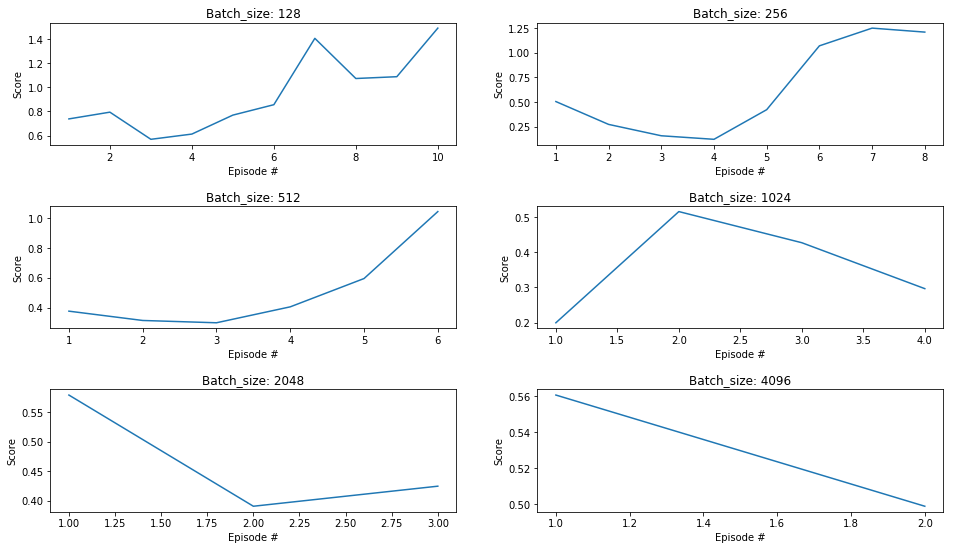

In [15]:
# Trial Run


start = time.time()

batch_sizes = [128, 256, 512, 1024, 2048, 4096]
#episode_sizes = [240, 200, 160, 120, 80, 40]
episode_sizes = [10, 8, 6, 4, 3, 2]
#batch_sizes = [128, 256]
scorelist = []
batch_times = []

for batch_size, episodes in zip(batch_sizes, episode_sizes):
    loopstart = time.time()
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=2)
    scorelist.append(scores)
    loopend = time.time()
    print("\n")
    print("Batch size: ", batch_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 2, rows = 3)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

Episode 10	Average score in the latest 10 episodes: 0.7129999840632082
Last 10 episodes took 138.00229859352112 seconds
Episode 20	Average score in the latest 10 episodes: 2.4234499458316714
Last 10 episodes took 136.6119725704193 seconds
Episode 30	Average score in the latest 10 episodes: 5.614599874503911
Last 10 episodes took 132.55437898635864 seconds
Episode 40	Average score in the latest 10 episodes: 8.504499809909612
Last 10 episodes took 132.8834080696106 seconds
Episode 50	Average score in the latest 10 episodes: 8.308899814281613
Last 10 episodes took 131.5006136894226 seconds
Episode 60	Average score in the latest 10 episodes: 12.034499731007966
Last 10 episodes took 132.21987104415894 seconds
Episode 70	Average score in the latest 10 episodes: 19.1154495727364
Last 10 episodes took 132.47405886650085 seconds
Episode 80	Average score in the latest 10 episodes: 22.90879948794842
Last 10 episodes took 133.4253809452057 seconds
Episode 90	Average score in the latest 10 episodes

Episode 90	Average score in the latest 10 episodes: 32.07209928313271
Last 10 episodes took 241.35868191719055 seconds
Episode 100	Average score in the latest 10 episodes: 34.504299228768794
Last 10 episodes took 240.75275230407715 seconds
Episode 110	Average score in the latest 10 episodes: 33.40704925329425
Last 10 episodes took 241.4868519306183 seconds
Episode 120	Average score in the latest 10 episodes: 31.039299306217583
Last 10 episodes took 241.68829774856567 seconds


Batch size:  1024  took  2877.1137199401855  seconds.


Episode 10	Average score in the latest 10 episodes: 2.6721999402716756
Last 10 episodes took 349.3621871471405 seconds
Episode 20	Average score in the latest 10 episodes: 31.30884930019267
Last 10 episodes took 370.8201947212219 seconds
Episode 30	Average score in the latest 10 episodes: 36.14689919205382
Last 10 episodes took 372.23906564712524 seconds
Episode 40	Average score in the latest 10 episodes: 34.59034922684543
Last 10 episodes took 372.4554877281

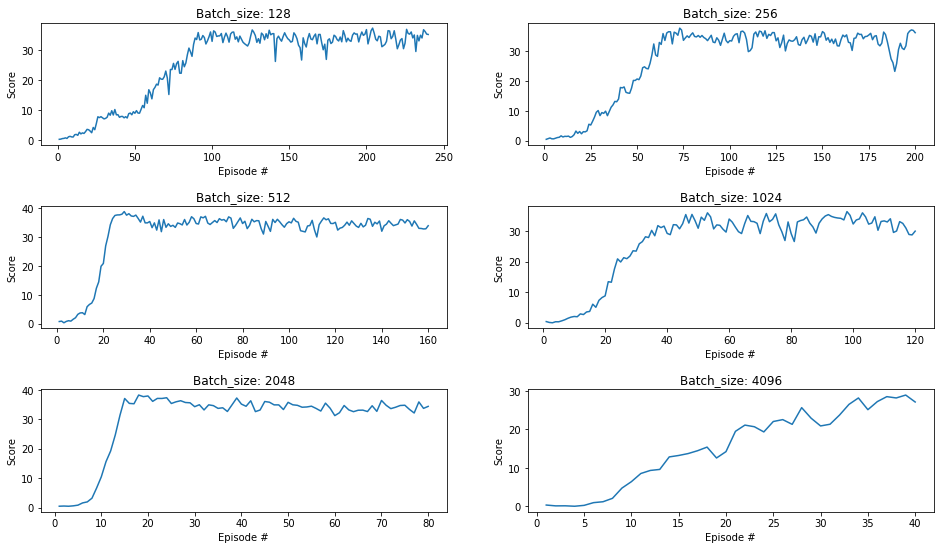

In [16]:
# Final Run


start = time.time()

batch_sizes = [128, 256, 512, 1024, 2048, 4096]
episode_sizes = [240, 200, 160, 120, 80, 40]
#episode_sizes = [12, 10, 8, 6, 4, 2]
#batch_sizes = [128, 256]
scorelist = []
batch_times = []

for batch_size, episodes in zip(batch_sizes, episode_sizes):
    loopstart = time.time()
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=10)
    scorelist.append(scores)
    loopend = time.time()
    print("\n")
    print("Batch size: ", batch_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 2, rows = 3)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

Starting training for batch size: 128...


Episode 10	Average score in the latest 10 episodes: 0.5834999869577586
Last 10 episodes took 133.70858907699585 seconds
Episode 20	Average score in the latest 20 episodes: 0.9633499784674496
Last 10 episodes took 127.52627468109131 seconds
Episode 30	Average score in the latest 30 episodes: 1.1371333079164228
Last 10 episodes took 129.60081505775452 seconds
Episode 40	Average score in the latest 40 episodes: 1.1738374737626873
Last 10 episodes took 132.64057517051697 seconds
Episode 50	Average score in the latest 50 episodes: 1.3202099704910069
Last 10 episodes took 132.75000643730164 seconds
Episode 60	Average score in the latest 60 episodes: 1.4050833019272737
Last 10 episodes took 132.43530535697937 seconds
Episode 70	Average score in the latest 70 episodes: 1.5736071076842821
Last 10 episodes took 128.62625408172607 seconds
Episode 80	Average score in the latest 80 episodes: 1.798968709789915
Last 10 episodes took 127.60260558128357 second

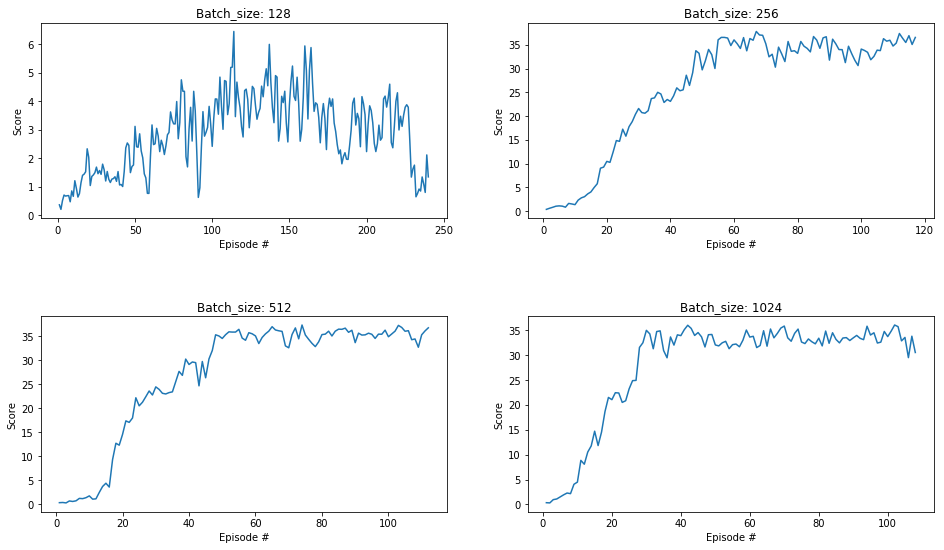

In [26]:
start = time.time()

batch_sizes = [128, 256, 512, 1024]
episode_sizes = [240, 240, 240, 240]
#episode_sizes = [12, 10, 8, 6, 4, 2]
#batch_sizes = [128, 256]
scorelist = []
batch_times = []

for batch_size, episodes in zip(batch_sizes, episode_sizes):
    loopstart = time.time()
    print('Starting training for batch size: {}...'.format(batch_size))
    print('\n')
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=10, stable_episode_count=100, target_score=30)
    scorelist.append(scores)
    loopend = time.time()
    print("Batch size: ", batch_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 2, rows = 2)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

Starting training for batch size: 128...


Episode 10	Average score in the latest 10 episodes: 1.17989997362718
Last 10 episodes took 140.1247103214264 seconds
Episode 20	Average score in the latest 20 episodes: 2.6390999410115183
Last 10 episodes took 142.9733111858368 seconds
Episode 30	Average score in the latest 30 episodes: 5.816383203327035
Last 10 episodes took 141.82411193847656 seconds
Episode 40	Average score in the latest 40 episodes: 8.143849817970768
Last 10 episodes took 145.28900289535522 seconds
Episode 50	Average score in the latest 50 episodes: 10.351459768626837
Last 10 episodes took 133.86875104904175 seconds
Episode 60	Average score in the latest 60 episodes: 12.672099716756492
Last 10 episodes took 142.3773958683014 seconds
Episode 70	Average score in the latest 70 episodes: 15.121463947723221
Last 10 episodes took 140.3292577266693 seconds
Episode 80	Average score in the latest 80 episodes: 17.38091836150619
Last 10 episodes took 146.39008593559265 seconds
Episod

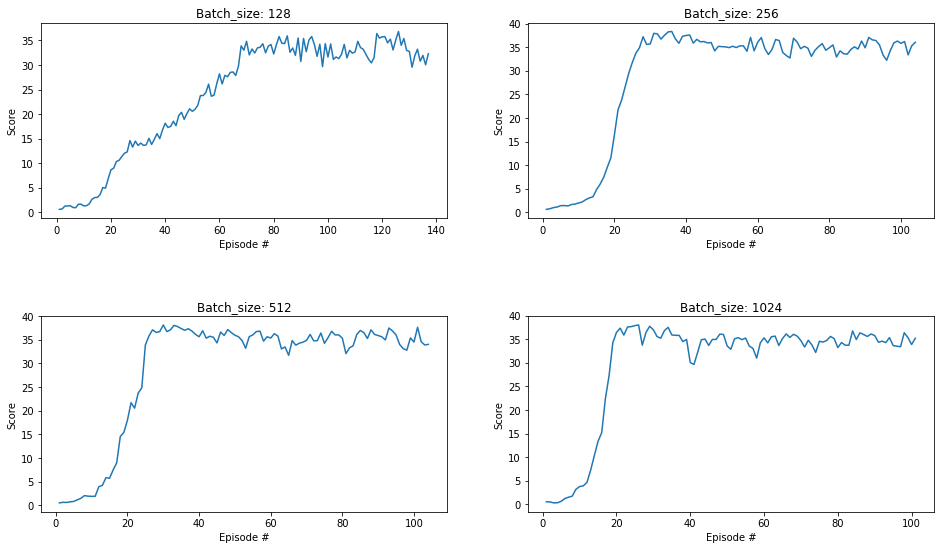

In [27]:
start = time.time()

batch_sizes = [128, 256, 512, 1024]
episode_sizes = [240, 240, 240, 240]
#episode_sizes = [12, 10, 8, 6, 4, 2]
#batch_sizes = [128, 256]
scorelist = []
batch_times = []

for batch_size, episodes in zip(batch_sizes, episode_sizes):
    loopstart = time.time()
    print('Starting training for batch size: {}...'.format(batch_size))
    print('\n')
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=10, stable_episode_count=100, target_score=30)
    scorelist.append(scores)
    loopend = time.time()
    print("Batch size: ", batch_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 2, rows = 2)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

Starting training for buffer size: 10000...


Episode 10	Average score in the latest 10 episodes: 1.2520499720145017
Last 10 episodes took 136.35004711151123 seconds
Episode 20	Average score in the latest 20 episodes: 3.0319999322295192
Last 10 episodes took 136.46431136131287 seconds
Episode 30	Average score in the latest 30 episodes: 7.606233163320771
Last 10 episodes took 136.753173828125 seconds
Episode 36	Average score in the latest 36 episodes: 10.514874764974229
The score average is over 10 in the last 100 episodes. Stop the training.
Buffer size:  10000  took  491.7194504737854  seconds.


Starting training for buffer size: 100000...


Episode 10	Average score in the latest 10 episodes: 1.136699974592775
Last 10 episodes took 139.90038180351257 seconds
Episode 20	Average score in the latest 20 episodes: 2.688949939897284
Last 10 episodes took 142.55911087989807 seconds
Episode 30	Average score in the latest 30 episodes: 6.5907665193515514
Last 10 episodes took 142.4216301441192

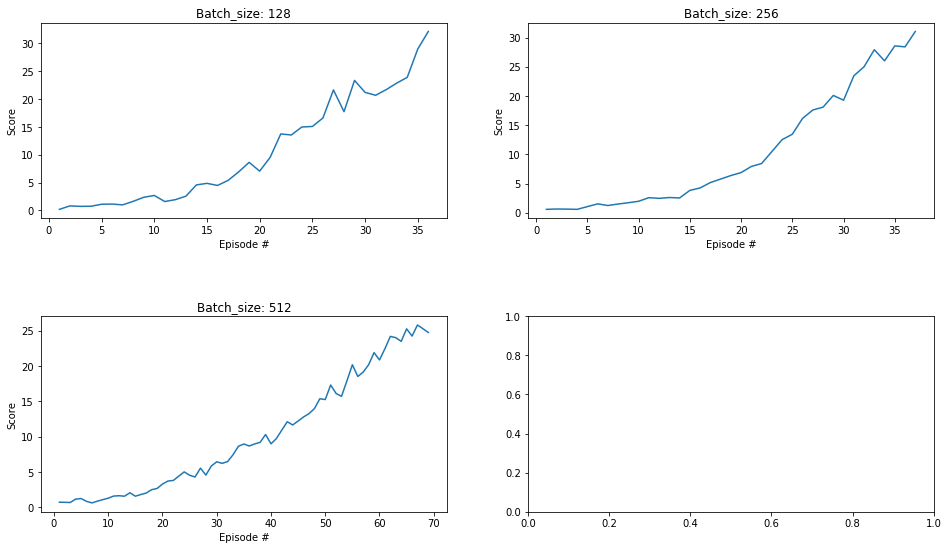

In [29]:
start = time.time()

batch_size = 256
buffer_sizes = [int(1e4), int(1e5), int(1e6)]
episode_sizes = [240, 240, 240]
#episode_sizes = [12, 10, 8, 6, 4, 2]
#batch_sizes = [128, 256]
scorelist = []
batch_times = []

for buffer_size, episodes in zip(buffer_sizes, episode_sizes):
    loopstart = time.time()
    print('Starting training for buffer size: {}...'.format(buffer_size))
    print('\n')
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size, BUFFER_SIZE=buffer_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=10, stable_episode_count=100, target_score=10)
    scorelist.append(scores)
    loopend = time.time()
    print("\rBuffer size: ", buffer_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 2, rows = 2)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

Starting training for buffer size: 1000...


Episode 10	Average score in the latest 10 episodes: 0.7435999833792447
Last 10 episodes took 135.6342535018921 seconds
Episode 20	Average score in the latest 20 episodes: 1.0849499757494776
Last 10 episodes took 135.84097242355347 seconds
Episode 30	Average score in the latest 30 episodes: 1.6888999622501433
Last 10 episodes took 135.86649346351624 seconds
Episode 40	Average score in the latest 40 episodes: 2.443974945372902
Last 10 episodes took 134.65826892852783 seconds
Episode 50	Average score in the latest 50 episodes: 2.5753199424371127
Last 10 episodes took 135.3493309020996 seconds
Episode 60	Average score in the latest 60 episodes: 2.3931499465089296
Last 10 episodes took 135.77815294265747 seconds
Episode 70	Average score in the latest 70 episodes: 2.159328523163817
Last 10 episodes took 138.68102741241455 seconds
Episode 80	Average score in the latest 80 episodes: 1.978149955784902
Last 10 episodes took 133.79545974731445 seconds


Episode 110	Average score in the latest 100 episodes: 20.495789541883397
Last 10 episodes took 255.4410412311554 seconds
Episode 120	Average score in the latest 100 episodes: 23.83498946724646
Last 10 episodes took 255.87745714187622 seconds
Episode 130	Average score in the latest 100 episodes: 26.70845440301952
Last 10 episodes took 254.97488617897034 seconds
Episode 140	Average score in the latest 100 episodes: 29.235124346544033
Last 10 episodes took 255.72679710388184 seconds
Episode 144	Average score in the latest 100 episodes: 30.166329325729986
The score average is over 30 in the last 100 episodes. Stop the training.
Buffer size:  1000000  took  3358.137422323227  seconds.


Elapsed  10830.150776386261  seconds.


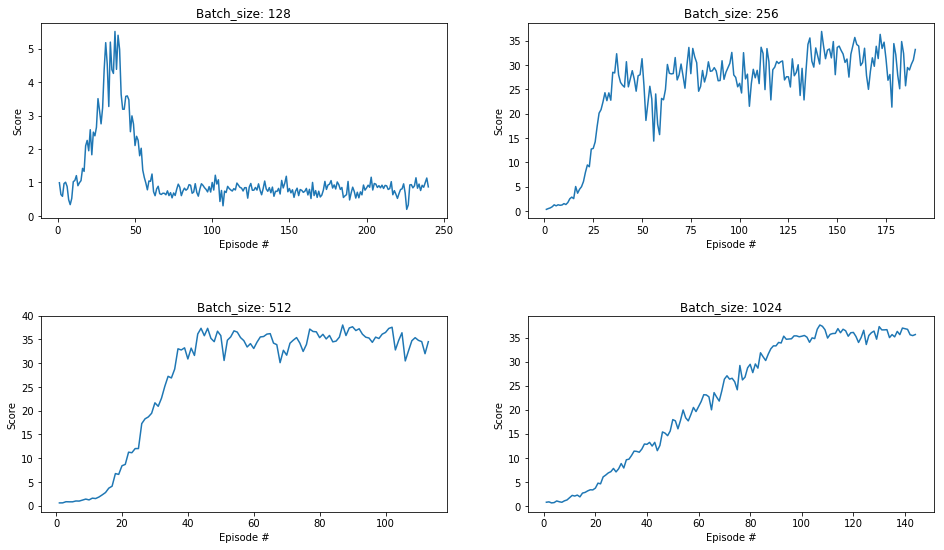

In [30]:
start = time.time()

batch_size = 256
buffer_sizes = [int(1e3), int(1e4), int(1e5), int(1e6)]
episode_sizes = [240, 240, 240, 240]
#episode_sizes = [12, 10, 8, 6, 4, 2]
#batch_sizes = [128, 256]
scorelist = []
batch_times = []

for buffer_size, episodes in zip(buffer_sizes, episode_sizes):
    loopstart = time.time()
    print('Starting training for buffer size: {}...'.format(buffer_size))
    print('\n')
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size, BUFFER_SIZE=buffer_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=10, stable_episode_count=100, target_score=30)
    scorelist.append(scores)
    loopend = time.time()
    print("\rBuffer size: ", buffer_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 2, rows = 2)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

Starting training for batch size: 256...


Episode 10	Average score in the latest 10 episodes: 1.0321999769285322
Last 10 episodes took 141.58201599121094 seconds
Episode 20	Average score in the latest 20 episodes: 4.5966748972563085
Last 10 episodes took 146.64854836463928 seconds
Episode 30	Average score in the latest 30 episodes: 11.26459974821657
Last 10 episodes took 144.36819458007812 seconds
Episode 40	Average score in the latest 40 episodes: 17.024437119474168
Last 10 episodes took 145.07437419891357 seconds
Episode 50	Average score in the latest 50 episodes: 20.435709543226288
Last 10 episodes took 143.36664724349976 seconds
Episode 60	Average score in the latest 60 episodes: 22.494207830548596
Last 10 episodes took 143.63900113105774 seconds
Episode 70	Average score in the latest 70 episodes: 24.168049459801985
Last 10 episodes took 143.34466695785522 seconds
Episode 80	Average score in the latest 80 episodes: 25.371443182904038
Last 10 episodes took 143.47706651687622 second

AttributeError: 'AxesSubplot' object has no attribute 'flat'

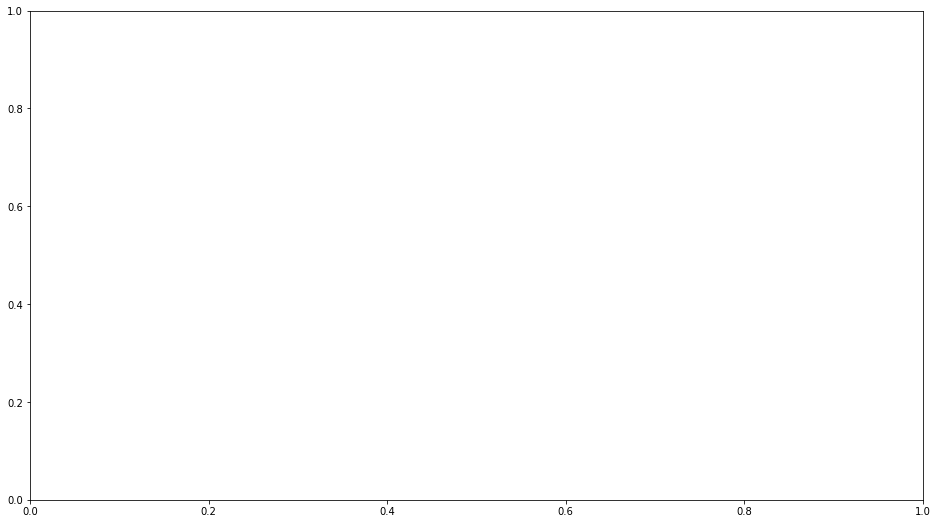

In [31]:
start = time.time()

batch_sizes = [256]
episode_sizes = [240]

scorelist = []
batch_times = []

for batch_size, episodes in zip(batch_sizes, episode_sizes):
    loopstart = time.time()
    print('Starting training for batch size: {}...'.format(batch_size))
    print('\n')
    ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size)
    scores = ddpgrunner(ddpgagent, episodes = episodes, print_every=10, stable_episode_count=100, target_score=30)
    scorelist.append(scores)
    loopend = time.time()
    print("Batch size: ", batch_size, " took ", loopend - loopstart, " seconds.")
    print("\n")
    batch_times.append(loopend - loopstart)

plotGraphs(scorelist, cols = 1, rows = 1)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

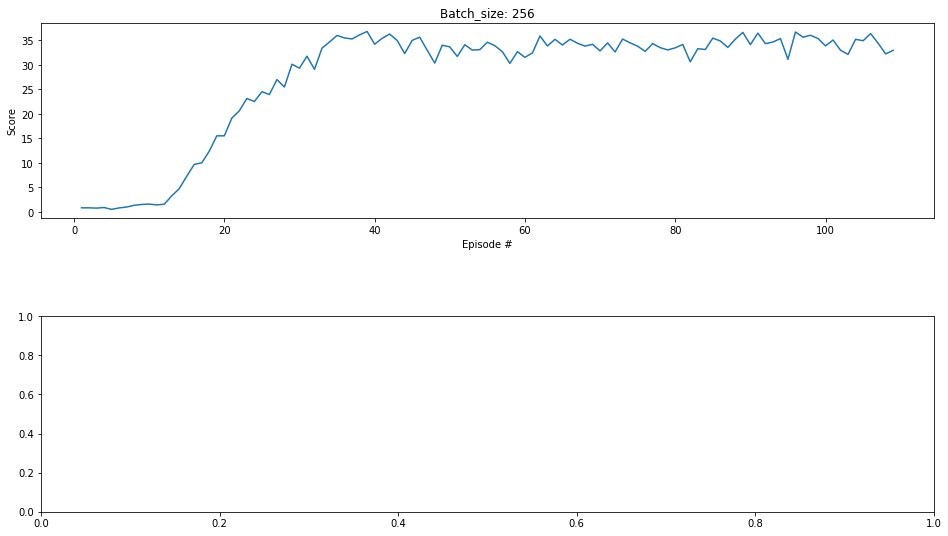

In [32]:
plotGraphs(scorelist, cols = 1, rows = 2)

In [33]:
ddpgagent = DDPGAgent(33, BATCH_SIZE=batch_size)

ddpgagent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
ddpgagent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name] 
state = env_info.vector_observations
for t in range(200):
    action = ddpgagent.act(state)
    env_info = env.step(action)
    state = env_info["ReacherBrain"].vector_observations
    dones = env_info["ReacherBrain"].local_done
    if np.any(dones):                                  
        break

In [34]:
env.close()